In [2]:
import sys
import pip
#pip.main(['install','citipy'])
#print(sys.executable)


In [3]:
#Dependencies
import pandas as pd
import numpy as np
from citipy import citipy
import  openweathermapy as ow
import csv
import matplotlib
import seaborn
import requests as req
from pprint import pprint
from config import api_key

 

In [4]:
#Cord=pd.dataframe()
cord_lat =np.random.randint(-80,80,1500)
cord_lon =np.random.randint(-180,180,1500)

In [5]:
#for loop
citylist = []
count = 0
dup = 'no'
country =[]
weather_data = []
Url =[]

#Grab list of cities based on coordinates from citipy

for x in range(-90,90,5):
    for y in range(-180,180,5):
        city = citipy.nearest_city(x, y)
        citdict = {}
        citdict['city'] = city.city_name
        citdict['country'] = city.country_code
        citdict['lat'] = x
        citdict['long'] = y
        if len(citylist) == 0:
            citylist.append(citdict)
            count+=1
            continue
        else:
#Get rid of duplicates
            for city in citylist:
                if city['city'] == citdict['city']:
                    dup = 'yes'
        if dup == 'no':
            citylist.append(citdict)
            count+=1
        else:
            dup = 'no'
# print(citylist[0])

In [6]:
#Create dataframe. Grab 1500 random cities


In [7]:
# Create a settings object with your API key and preferred units
settings = {"units": "metric", "appid": api_key}
Url = []

#build Url &Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={settings}&q="


#print(query_url)

for index , row in weather_data.iterrows():
    #print(row['city'])
    response = req.get(query_url + row['city']).json()
    
    print(response)
    
    
    if (response['cod'] == 200):
        #print(response['main']['temp'])
        weather_data.loc[index,'temperature'] = response['main']['temp']
        weather_data.loc[index,'clouds'] = response['clouds']['all']
        weather_data.loc[index,'humidity']= response['main']['humidity']
        weather_data.loc[index,'humidity']= response['main']['humidity']
        weather_data.loc[index,'WindSpeed']= response['wind']['speed']
        
       
       

AttributeError: 'list' object has no attribute 'iterrows'

In [1]:
#dict= {"CityNumber":citydata, "Name of City":Name_of_City ,"Url":Url}
citydf = pd.DataFrame({
    'city': [x['city'] for x in citylist],
    'country': [x['country'] for x in citylist],
    'Latitude':[x['lat'] for x in citylist],
    'URL':[X['Url']for x in citylist]
    
})


weather_data = citydf
citydf.head()

#DF.to_csv("Citydata.csv")



NameError: name 'pd' is not defined

In [25]:
weather_data.head()
#print(weather_data)
#wd = weather_data.sample(50)
#wd.head()

,Latitude,city,country,temperature,clouds,humidity,WindSpeed
0,-90,vaini,to,305.555,64.0,47.0,3.08
1,-90,mataura,pf,289.605,8.0,60.0,7.63
2,-90,rikitea,pf,299.505,64.0,100.0,4.76
3,-90,punta arenas,cl,277.150,75.0,80.0,10.30
4,-90,ushuaia,ar,281.150,40.0,42.0,8.70


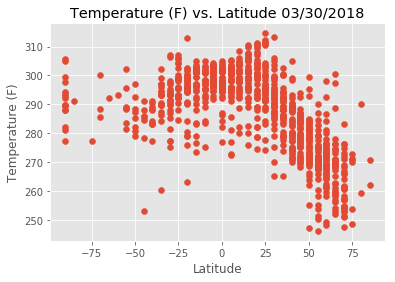

In [26]:
import time
import matplotlib.pyplot as plt
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(weather_data['Latitude'],weather_data['temperature'])
plt.title(f"Temperature (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
#Save fig
plt.savefig("Temperature.png")
plt.show()

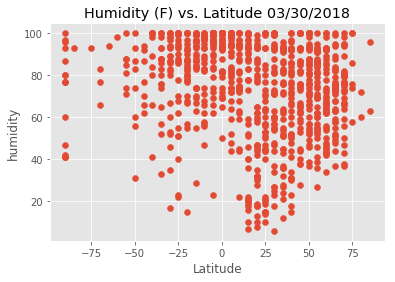

In [27]:
import time
import matplotlib.pyplot as plt
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(weather_data['Latitude'],weather_data['humidity'])
plt.title(f"Humidity (F) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("humidity")
plt.style.use('ggplot')
#Save fig
plt.savefig("humidity.png")
plt.show()

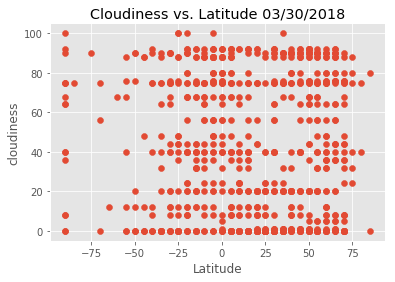

In [28]:
import time
import matplotlib.pyplot as plt
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(weather_data['Latitude'],weather_data['clouds'])
plt.title(f"Cloudiness vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("cloudiness")
plt.style.use('ggplot')
#Save fig
plt.savefig("cloudiness.png")
plt.show()

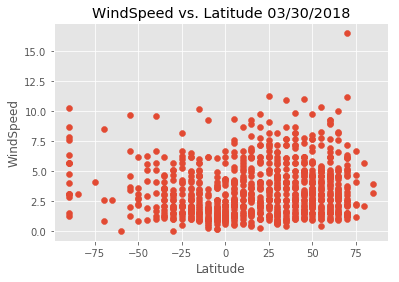

In [29]:
import time
import matplotlib.pyplot as plt
date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(weather_data['Latitude'],weather_data['WindSpeed'])
plt.title(f"WindSpeed vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.style.use('ggplot')
#Save fig
plt.savefig("WindSpeed.png")
plt.show()